# Practical quantum mechanics using computers

The standard approach to learning quantum mechanics (QM) involves a fair amount of theory, with some relatively simple pen-and-paper calculations once the theory has been introduced.  But the vast majority of practical QM calculations are done numerically, using a computer.  This series of ipython notebooks is designed to show you how this works, and to give you the ability to do these calculations for yourself.  They should deepen your understanding of how QM works.
In this notebook, we will be setting up some basic python functions to allow you to calculate the energies of arbitrary states in an infinite square well; these functions will then be used when we change the basis set, and change the potential.

The rough flow of all these QM calculations will be:

* Choose and define a basis set
* Define the potential in the well (either as a function or by values on a grid)
* Create the Hamiltonian matrix
* Diagonalise (using libraries) to give eigenvalues and eigenvectors
* Display the results

Before we write any of the code, we need to import the basic libraries that we will be using (numpy, matplotlib). IPython provides a convenient shortcut for doing this in one go:

In [1]:
# Import libraries and set up in-line plotting.
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In general, if we have a basis set $\vert\phi_i\rangle, i=1\rightarrow N$, we write the Hamiltonian matrix element between two basis functions as:

$$
H_{ij} = \langle \phi_i\vert\hat{H}\vert\phi_j\rangle
$$

Typically these matrix elements are found by integration on a grid in real space, though there are many other approaches (and some operators and functions where this is not possible).  Remember that the indices $i$ and $j$ in $H_{ij}$ are *arbitrary*: that is, they can each take on any of the values from $1$ to $N$.

## The eigenbasis

The simplest (but least illustrative !) basis set to use is that of the eigenvectors for the system.  For the square well, these are very simple to deduce (they are identical to the solutions for waves on a classical string fixed at both ends).  If we define the potential to be $V(x) = 0, 0 < x < a; V(x) = \infty, x>a; V(x) = \infty, x<0$, then the eigenvectors are:
$$
\phi_n(x) = A\sin\left(\frac{n\pi x}{a}\right), n=1, 2, 3, \ldots
$$

where $A$ is an appropriate normalisation constant (it's easy to show that the constant is $\sqrt{2/a}$ but we want a general approach to normalisation so we'll add a numerical normalisation routine).  We can create a function to generate a set of eigenvectors in an array in python, and another function to normalise them; we will do this in just a moment.  

However, we must first note an important point: the basis set we have defined here is technically infinite: that is, when we say that $i=1 \rightarrow N$, we have $N=\infty$.  Of course, even with powerful computers, we cannot use an infinite basis set, so we will have to *truncate* the set by choosing a maximum, finite value for $N$ (and note that this will mean that our calculations will be approximations, though we can improve the approximation by increasing the value we have chosen for $N$).

In the next cell we will write a function `eigenbasis_sw` which will create a collection of (approximations to) the first $N$ the general eigenstates $\phi_{n}(x)$ expressed as numpy arrays. For completeness (and as a check) we'll then plot some of these.  We can create a similar function which creates the second derivatives (for the kinetic energy), `d2eigenbasis_sw`, and an integration routine that we can use for normalisation, `integrate_function`.  (In this case, we can write the second derivatives rather easily; we will see a numerical approach to differentiation in another notebook.)


We will be making use of a Python feature called list comprehension in order to conveniently create collections of objects. Here we use a list comprehension to create a collection of the squares of the integers from 1 to 5:

In [2]:
[ x*x for x in range(1,6)]

[1, 4, 9, 16, 25]

List comprehensions can be nested to make collections that resemble matrices. Here we use a list comprehension to create a matrix of the products of a few of the first integers:

In [3]:
[ [ x*y for x in range(1,5) ] for y in range(1,4) ]

[[1, 2, 3, 4], [2, 4, 6, 8], [3, 6, 9, 12]]

The collections created using list comprehensions can serve as a source of initial values for numpy arrays:

In [4]:
np.array([ [ x*y for x in range(1,5) ] for y in range(1,4) ])

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12]])

We will use list comprehensions with the `eigenbasis_sw` and `d2eigenbasis_sw` functions discussed above, to create a collection of eigenstates and their second derivatives.

In [5]:
number_of_base_states = 10 # The number of base states we want to consider
from numpy import sin, pi, sqrt # Because using np.sin and np.pi etc. is annoying

# Define the x-axis
width = 1.0
num_x_points = 101
x = np.linspace(0.0,width,num_x_points)
dx = width/(num_x_points - 1)

def eigenbasis_sw(n,width,x):
    """The eigenbasis for a square well, running from 0 to a (width), sin(n pi x/a)."""
    fac = pi*n/width
    return sin(fac*x)

def d2eigenbasis_sw(n,width,x):
    """The second derivative of the eigenbasis for a square well,
    running from 0 to a, sin(n pi x/a)"""
    fac = pi*n/width
    return -fac*fac*sin(fac*x)

unnormalised_eigenbases   = np.array([   eigenbasis_sw(n,width,x) for n in range(1,number_of_base_states+1) ])
d2unnormalised_eigenbases = np.array([ d2eigenbasis_sw(n,width,x) for n in range(1,number_of_base_states+1) ])

We will want to reuse the above code in other notebooks, so let's write it out to a file. We do this using IPython's ``%save`` magic and IPython's `_i` variable which stores the last input.

In [6]:
%save -f eigenstates.py _i

The following commands were written to file `eigenstates.py`:
number_of_base_states = 10 # The number of base states we want to consider
from numpy import sin, pi, sqrt # Because using np.sin and np.pi etc. is annoying

# Define the x-axis
width = 1.0
num_x_points = 101
x = np.linspace(0.0,width,num_x_points)
dx = width/(num_x_points - 1)

def eigenbasis_sw(n,width,x):
    """The eigenbasis for a square well, running from 0 to a (width), sin(n pi x/a)."""
    fac = pi*n/width
    return sin(fac*x)

def d2eigenbasis_sw(n,width,x):
    """The second derivative of the eigenbasis for a square well,
    running from 0 to a, sin(n pi x/a)"""
    fac = pi*n/width
    return -fac*fac*sin(fac*x)

unnormalised_eigenbases   = np.array([   eigenbasis_sw(n,width,x) for n in range(1,number_of_base_states+1) ])
d2unnormalised_eigenbases = np.array([ d2eigenbasis_sw(n,width,x) for n in range(1,number_of_base_states+1) ])


Now plot the first few eigenstates; we offset them vertically by adding 3(n-1) to make it clearer; remember that range(1,5) will give numbers 1 to 4. We don't normalise in this plot.

(0, 11)

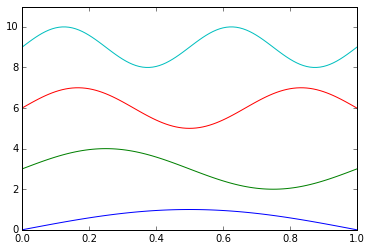

In [7]:
for n in range(1,5):
    plt.plot(x,eigenbasis_sw(n,width,x)+3*(n-1))
# Set y-axis range so that we can see all the functions
plt.ylim((0,11))

Do these make sense ? You should ask yourself if they match the boundary conditions, and if they fit with your expectations of the physical properties of the system.

We should now be confident that our function is correct (it's always worth checking this somehow, whether through plotting the output or a simple test).

Next we will normalise the eigenstates and their derivatites. To do this we need to be able to integrate our eigenstate functions. We'll use a VERY simple integration routine. Much better ones exist.

In [8]:
def integrate_function(f, dx):
    """Integrate a function approximated by a numpy array with spacing dx"""
    return sum(f)*dx

We'll keep this for future use, too:

In [9]:
%save -a eigenstates.py _i

The following commands were written to file `eigenstates.py`:
def integrate_function(f, dx):
    """Integrate a function approximated by a numpy array with spacing dx"""
    return sum(f)*dx


With this, we can calculate the normalisation factors for each of the basis states. These are simply $1/\sqrt{<\phi_n|\phi_n>}$.

In [10]:
normalisations = [ sqrt(1 / integrate_function(f*f, dx)) for f in unnormalised_eigenbases ]

In [11]:
%save -a eigenstates.py _i

The following commands were written to file `eigenstates.py`:
normalisations = [ sqrt(1 / integrate_function(f*f, dx)) for f in unnormalised_eigenbases ]


Then we multiply our bases and their second derivatives by their corresponding factors, to obtain their normalised versions.

In [12]:
normalised_eigenbases   = [ f*norm for (f,norm) in zip(  unnormalised_eigenbases, normalisations) ]
d2normalised_eigenbases = [ f*norm for (f,norm) in zip(d2unnormalised_eigenbases, normalisations) ]

In [13]:
%save -a eigenstates.py _i

The following commands were written to file `eigenstates.py`:
normalised_eigenbases   = [ f*norm for (f,norm) in zip(  unnormalised_eigenbases, normalisations) ]
d2normalised_eigenbases = [ f*norm for (f,norm) in zip(d2unnormalised_eigenbases, normalisations) ]


TODO remind about the first way to calculate the energies.

In [14]:
energies_numeric = [ integrate_function(phi_n / -2 * d2phi_n, dx)
                     for (phi_n, d2phi_n) in zip(normalised_eigenbases, d2normalised_eigenbases) ]

TODO Remind about the second way to calculate the energies

In [15]:
energies_analytic = [ n*n*pi*pi/2 for n in range(1, len(normalised_eigenbases)+1) ]

Comparing these results

In [16]:
for n,(E_n, E_a) in enumerate(zip(energies_numeric, energies_analytic),1):
    print "Energy calculated for eigenstate n = {:2d} is {:17.13f}".format(n, E_n)
    print "Energy expected   for eigenstate n = {:2d} is {:17.13f}".format(n, E_a)

Energy calculated for eigenstate n =  1 is   4.9348022005447
Energy expected   for eigenstate n =  1 is   4.9348022005447
Energy calculated for eigenstate n =  2 is  19.7392088021787
Energy expected   for eigenstate n =  2 is  19.7392088021787
Energy calculated for eigenstate n =  3 is  44.4132198049021
Energy expected   for eigenstate n =  3 is  44.4132198049021
Energy calculated for eigenstate n =  4 is  78.9568352087148
Energy expected   for eigenstate n =  4 is  78.9568352087149
Energy calculated for eigenstate n =  5 is 123.3700550136170
Energy expected   for eigenstate n =  5 is 123.3700550136170
Energy calculated for eigenstate n =  6 is 177.6528792196085
Energy expected   for eigenstate n =  6 is 177.6528792196085
Energy calculated for eigenstate n =  7 is 241.8053078266892
Energy expected   for eigenstate n =  7 is 241.8053078266892
Energy calculated for eigenstate n =  8 is 315.8273408348596
Energy expected   for eigenstate n =  8 is 315.8273408348595
Energy calculated for ei

we see that these numbers agree extremely well ! We would find worse agreement if we used fewer points in our x array (you might like to try this).

## Matrix representation

What about the rest of the Hamiltonian matrix, i.e. the numbers $\langle \phi_n \vert \hat{H} \vert \phi_m \rangle$ ? We'll calculate these in nested list comprehensions.

In [17]:
Hmat = np.array([[ integrate_function(phi_n / -2 * d2_phi_m, dx)
                   for    phi_n in   normalised_eigenbases ]
                   for d2_phi_m in d2normalised_eigenbases ])

In order to print this matrix out in a visually appealing way, we need to set some numpy print options:

In [18]:
np.set_printoptions(precision=3,linewidth=100,suppress=True) 
print Hmat

[[   4.935    0.       0.       0.       0.       0.       0.       0.       0.      -0.   ]
 [  -0.      19.739   -0.      -0.       0.      -0.       0.      -0.      -0.      -0.   ]
 [   0.       0.      44.413   -0.      -0.       0.      -0.      -0.       0.       0.   ]
 [  -0.      -0.      -0.      78.957    0.      -0.      -0.      -0.      -0.      -0.   ]
 [   0.       0.       0.       0.     123.37     0.       0.       0.      -0.      -0.   ]
 [   0.       0.       0.      -0.       0.     177.653   -0.      -0.       0.       0.   ]
 [   0.       0.      -0.      -0.       0.       0.     241.805   -0.       0.      -0.   ]
 [  -0.      -0.      -0.      -0.       0.      -0.      -0.     315.827   -0.       0.   ]
 [   0.      -0.       0.      -0.      -0.       0.       0.      -0.     399.719    0.   ]
 [  -0.      -0.       0.      -0.       0.       0.      -0.       0.       0.     493.48 ]]


It should not surprise you that the matrix is diagonal: because the basis vectors are eigenvectors, an operator acts on a basis vector and returns that basis vector multiplied by the relevant eigenvalue.  The orthogonality of the basis then ensures that only the diagonal elements are non-zero.

Of course, we can choose other basis vectors than the eigenvectors.  In these cases, the matrix will *not* be diagonal.  We will look at this in a subsequent notebook.

Once we have the Hamiltonian (or any observable matrix) we can find the eigenvalues and eigenvectors from the matrix.  There are many approaches to this, but we will rely on the built-in `numpy` routines in `numpy.linalg`: `eigh` for a Hermitian matrix (or just `eig` for a non-Hermitian matrix).

### Overall procedure

In general, when using the matrix approach to quantum mechanics, we will follow this pattern:

* Choose a basis for the problem, ${\vert\phi_{m}\rangle}$
* Create the Hamiltonian matrix, $\langle \phi_{m} \vert \hat{H} \vert \phi_{n} \rangle$
* Find the eigenvalues and eigenvectors of the Hamiltonian
* Or just evaluate the energy of a particular state, $\vert \psi \rangle$

There are many numerical libraries which allow you to solve for the eigenvalues and eigenvectors of a matrix.  We will introduce the `numpy` version of these, and show some examples, in the next notebook.

### A general state

It is helpful to remember that we can also explore what happens to a general state, written as:

$$\vert \psi \rangle = \sum_n c_n \vert \phi_n \rangle$$

We define an array of coefficients, and then build $\vert\psi\rangle$ and its second derivative, and evaluate the energy in two ways: first, directly, as the expectation value of the Hamiltonian operator in this state ($\langle \psi \vert \hat{H} \vert \psi \rangle$); second, by summing over the eigenvalues, weighted by the square modulus of the coefficients ($E = \sum_n \vert c_n \vert^2 E_n$).  Of course, these two should be exactly the same.

Define a coefficient array (with only the first 3 elements being non-zero, in this case). Use it to create the general state $\psi$ and its second derivative.

In [19]:
coeff_array = np.array([1.0, 2.0, 1.0] + [0]*7)
psi   = np.dot(coeff_array,   normalised_eigenbases)
d2psi = np.dot(coeff_array, d2normalised_eigenbases)

Normalise $\psi$ and apply the same factor to $\partial^2\psi/\partial x^2$

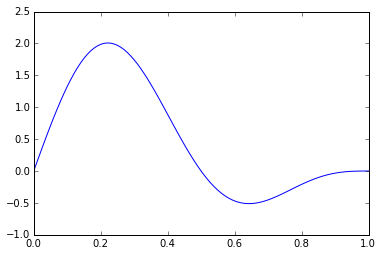

In [20]:
integral = integrate_function(psi * psi, dx)
psi      =   psi / sqrt(integral)
d2psi    = d2psi / sqrt(integral)

plt.plot(x,psi)

Evaluate the energy from $<\psi|H|\psi>$ - with no potential we just have the kinetic energy term. We set $\hbar = m = 1$, so KE = $-\frac{1}{2} d^2 H/dx^2$

In [21]:
Hpsi = -d2psi / 2
psi_numeric_energy  = integrate_function(psi * Hpsi, dx)
psi_analytic_energy = np.dot(coeff_array**2, energies_numeric) / integral

print "Energy analytically is: ", psi_numeric_energy
print "Energy analytically is: ", psi_analytic_energy

Energy analytically is:  21.384142869
Energy analytically is:  21.384142869


Again, we see that the energies agree perfectly.  Notice that the numerical approach, of evaluating the expectation value of the Hamiltonian through integration on a grid, is completely general, and can be extended to situations where the potential changes (though in that case we will need to look at how many basis functions we should include).